In [3]:
# read wav file, but it can just get the bunary data
import wave

In [18]:
wav = wave.open("dolphinsound_20_sec.wav", mode="r")
print(wav.getparams())

_wave_params(nchannels=2, sampwidth=2, framerate=96000, nframes=1920001, comptype='NONE', compname='not compressed')


In [26]:
wav.rewind()
data = wav.readframes(10)
data

b'\xbf\xf89\x00\xd6\xf7\x1f\x00\x81\xf6\xcb\xffP\xf6\x01\x00\x8e\xf7&\x00\x19\xf9\xe4\xffr\xf9\xd5\xff[\xfa)\x00\x02\xfb$\x00\xc7\xf9\xd7\xff'

In [1]:
# another useable function from scipy, it can get the sampling freq and numpy array data 
from scipy.io.wavfile import read

In [11]:
fs, data = read("dolphinsound_20_sec.wav")
data.shape
fs

96000

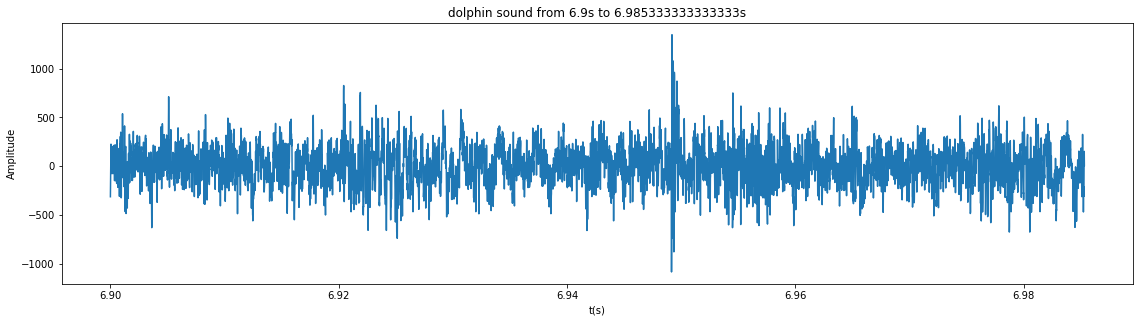

8192

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import math
ch1 = data[:,0]
tstart = int(6.9*fs)
tend = int(6.9*fs + 1024*8)

ch1 = ch1[tstart:tend]

# offset the constant shift. remove DC offset
ch1 = ch1-np.mean(ch1)

t = np.arange(tstart/fs, tend/fs, 1/fs)
t = check_len(t, 1024*8)
# pad = np.zeros(int(math.pow(2, next2)-N))
# ch1 = np.concatenate((ch1, pad))

plt.figure(figsize=(6.4*3, 4.8))
plt.plot(t, ch1)
plt.xlabel("t(s)")
plt.ylabel("Amplitude")
plt.title("dolphin sound from {}s to {}s".format(tstart/fs, tend/fs))
plt.show()
len(ch1)

In [4]:
def check_len(x, length):
    if(len(x) == length):
        return x
    elif (len(x) > length):
        return np.delete(x, np.arange(length, len(x)))

In [163]:
# it is weird that at time 15 the amount is wrong, due to the floating overflow, so numpy.arange might exceed the 
# stop value, so create the check_len to delete the exceed index.
(15 + 4096*1/fs - 15)/(1/fs)

4096.000000000061

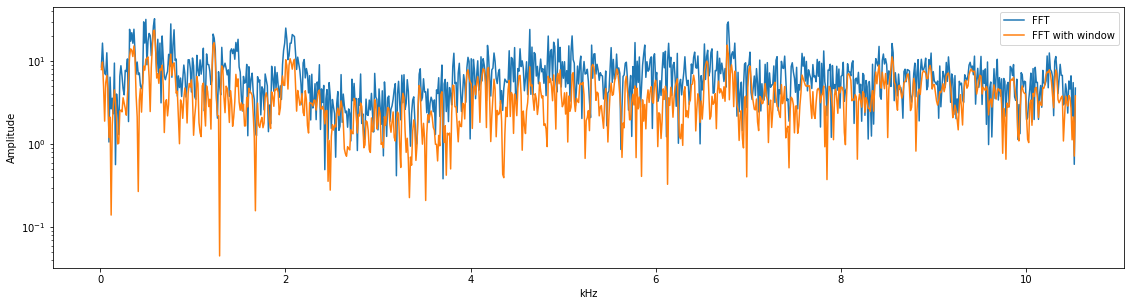

In [43]:
from scipy.signal.windows import blackmanharris, blackman, hann, hamming, gaussian
N = len(ch1)

w = blackman(N)
ch1w = ch1*w

ch1wk = np.fft.fft(ch1w)
ch1k = np.fft.fft(ch1)

absch1 = np.abs(ch1k)/N*2
absch1w = np.abs(ch1wk)/N*2

f = np.arange(0, fs, fs/N)
plt.figure(figsize=(6.4*3, 4.8))
# plt.semilogy(f[1:(N+1)//2]/1000, absch1[1:(N+1)//2])
# plt.semilogy(f[1:(N+1)//2]/1000, absch1w[1:(N+1)//2])
plt.semilogy(f[1:900]/1000, absch1[1:900])
plt.semilogy(f[1:900]/1000, absch1w[1:900])
plt.legend(["FFT", "FFT with window"])
plt.xlabel("kHz")
plt.ylabel("Amplitude")

plt.show()


In [18]:
f[(N+1)//2]

48000.0

In [11]:
print(absch1.argmax())
absch1.max()

396


112.04798950572652

In [12]:
f[396]

1160.15625

In [20]:
10000/(96000/1024/8)

853.3333333333334

In [19]:
(N+1)//2

4096